In [83]:
import pandas as pd
df = pd.read_csv("../data/311_manhattan.csv")
print(df.shape)
df.head()

(1000, 7)


,created_date,complaint_type,descriptor,borough,latitude,longitude,street_name
0,2025-10-11T01:36:09.000,Noise - Residential,Loud Music/Party,MANHATTAN,40.823974,-73.950550,WEST 142 STREET
1,2025-10-11T01:35:49.000,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,40.819249,-73.952927,WEST 135 STREET
2,2025-10-11T01:34:38.000,Illegal Parking,Blocked Hydrant,MANHATTAN,40.787913,-73.973443,WEST 87 STREET
3,2025-10-11T01:31:24.000,Drinking,In Public,MANHATTAN,40.819249,-73.952927,WEST 135 STREET
4,2025-10-11T01:31:07.000,Noise - Street/Sidewalk,Loud Talking,MANHATTAN,40.724370,-73.975518,AVENUE D


In [84]:
# View general info about the dataframe
df.info()

# Count missing values per column
print("\nMissing values per column:")
print(df.isna().sum())

# Basic numeric stats (latitude, longitude)
print("\nDescriptive stats:")
print(df.describe())

# Check a few sample rows
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   created_date    1000 non-null   object 
 1   complaint_type  1000 non-null   object 
 2   descriptor      975 non-null    object 
 3   borough         1000 non-null   object 
 4   latitude        992 non-null    float64
 5   longitude       992 non-null    float64
 6   street_name     976 non-null    object 
dtypes: float64(2), object(5)
memory usage: 54.8+ KB

Missing values per column:
created_date       0
complaint_type     0
descriptor        25
borough            0
latitude           8
longitude          8
street_name       24
dtype: int64

Descriptive stats:
         latitude   longitude
count  992.000000  992.000000
mean    40.784156  -73.965123
std      0.043811    0.024484
min     40.702384  -74.021232
25%     40.749237  -73.986331
50%     40.784454  -73.962546
75%     40.819249  

,created_date,complaint_type,descriptor,borough,latitude,longitude,street_name
0,2025-10-11T01:36:09.000,Noise - Residential,Loud Music/Party,MANHATTAN,40.823974,-73.950550,WEST 142 STREET
1,2025-10-11T01:35:49.000,Noise - Street/Sidewalk,Loud Music/Party,MANHATTAN,40.819249,-73.952927,WEST 135 STREET
2,2025-10-11T01:34:38.000,Illegal Parking,Blocked Hydrant,MANHATTAN,40.787913,-73.973443,WEST 87 STREET
3,2025-10-11T01:31:24.000,Drinking,In Public,MANHATTAN,40.819249,-73.952927,WEST 135 STREET
4,2025-10-11T01:31:07.000,Noise - Street/Sidewalk,Loud Talking,MANHATTAN,40.724370,-73.975518,AVENUE D


In [85]:
# See the most frequent complaint types
print("\nTop complaint types:")
print(df['complaint_type'].value_counts().head(20))

# Explore descriptors for 'Illegal Parking' complaints
print("\nDescriptors for 'Illegal Parking':")
print(df.loc[df['complaint_type'].str.contains("Illegal Parking", case=False, na=False), 'descriptor'].value_counts().head(20))



Top complaint types:
complaint_type
Noise - Street/Sidewalk       162
Noise - Residential           161
Noise - Commercial             62
Illegal Parking                59
HEAT/HOT WATER                 52
Noise - Helicopter             37
UNSANITARY CONDITION           31
Noise - Vehicle                27
Noise                          26
PAINT/PLASTER                  20
Homeless Person Assistance     19
Encampment                     17
Water System                   16
Street Condition               15
Taxi Complaint                 14
Noise - Park                   14
Vendor Enforcement             12
Drinking                       12
Dirty Condition                11
PLUMBING                       11
Name: count, dtype: int64

Descriptors for 'Illegal Parking':
descriptor
Blocked Hydrant                   17
Posted Parking Sign Violation     16
Blocked Bike Lane                  8
Double Parked Blocking Traffic     5
Parking Permit Improper Use        3
Double Parked Blocking Ve

In [86]:
truck_related = [
    'Illegal Parking',
    'Blocked Driveway',
    'Blocked Sidewalk',
    'Blocked Crosswalk',
    'Commercial Overnight Parking',
    'Double Parked Commercial Vehicle'
]

df_truck = df[df['complaint_type'].isin(truck_related)].copy()

print("Total truck-related complaints:", len(df_truck))
print("\nComplaint types included:")
print(df_truck['complaint_type'].value_counts())


Total truck-related complaints: 61

Complaint types included:
complaint_type
Illegal Parking     59
Blocked Driveway     2
Name: count, dtype: int64


In [6]:
keywords = ['truck', 'delivery', 'commercial', 'double park', 'loading']
mask = (
    df['complaint_type'].str.lower().str.contains('|'.join(keywords), na=False) |
    df['descriptor'].str.lower().str.contains('|'.join(keywords), na=False)
)
df_truck_kw = df[mask].copy()

print("Total complaints after keyword filtering:", len(df_truck_kw))
df_truck_kw['complaint_type'].value_counts().head(10)


Total complaints after keyword filtering: 99


complaint_type
Noise - Commercial               62
Noise - Vehicle                  23
Illegal Parking                   9
Commercial Disposal Complaint     3
Noise                             2
Name: count, dtype: int64

In [7]:
df_truck_kw.to_csv("../data/311_truck_filtered.csv", index=False)

In [8]:
df_truck_filtered = pd.read_csv("../data/311_truck_filtered.csv")
print(df_truck_filtered.shape)
df_truck_filtered.head()

(99, 7)


,created_date,complaint_type,descriptor,borough,latitude,longitude,street_name
0,2025-10-11T01:29:21.000,Noise - Commercial,Loud Music/Party,MANHATTAN,40.815619,-73.943483,ADAM CLAYTON POWELL BOULEVARD
1,2025-10-11T01:25:01.000,Noise - Commercial,Loud Music/Party,MANHATTAN,40.809210,-73.944449,LENOX AVENUE
2,2025-10-11T01:20:46.000,Noise - Commercial,Loud Music/Party,MANHATTAN,40.761495,-73.963704,2 AVENUE
3,2025-10-11T01:17:56.000,Noise - Commercial,Loud Music/Party,MANHATTAN,40.722731,-73.989610,ELDRIDGE STREET
4,2025-10-11T01:14:09.000,Noise - Commercial,Loud Music/Party,MANHATTAN,40.755894,-73.967793,2 AVENUE


In [9]:
print("\nUnique complaint types:")
print(df_truck_filtered['complaint_type'].unique())

print("\nSample descriptors:")
print(df_truck_filtered['descriptor'].dropna().unique()[:15])



Unique complaint types:
['Noise - Commercial' 'Noise - Vehicle' 'Illegal Parking' 'Noise'
 'Commercial Disposal Complaint']

Sample descriptors:
['Loud Music/Party' 'Car/Truck Music' 'Double Parked Blocking Traffic'
 'Loud Talking' 'Banging/Pounding' 'Noise, Ice Cream Truck (NR4)'
 'Commercial Overnight Parking' 'Double Parked Blocking Vehicle'
 'Waste Disposal' 'Car/Truck Horn']


In [10]:
print(f"Filtered dataset has {len(df_truck_filtered)} rows, which is {len(df_truck_filtered)/len(df)*100:.2f}% of the total sample.")


Filtered dataset has 99 rows, which is 9.90% of the total sample.


In [11]:
df_check = pd.read_csv("../data/311_truck_filtered.csv")

print(df_check.shape)
print("\nUnique complaint types:")
print(df_check['complaint_type'].value_counts().head(20))

print("\nSample descriptors:")
print(df_check['descriptor'].dropna().unique()[:25])


(99, 7)

Unique complaint types:
complaint_type
Noise - Commercial               62
Noise - Vehicle                  23
Illegal Parking                   9
Commercial Disposal Complaint     3
Noise                             2
Name: count, dtype: int64

Sample descriptors:
['Loud Music/Party' 'Car/Truck Music' 'Double Parked Blocking Traffic'
 'Loud Talking' 'Banging/Pounding' 'Noise, Ice Cream Truck (NR4)'
 'Commercial Overnight Parking' 'Double Parked Blocking Vehicle'
 'Waste Disposal' 'Car/Truck Horn']


In [12]:
# Start with core curb/parking complaint types
curb_related = [
    'Illegal Parking',
    'Blocked Driveway',
    'Blocked Sidewalk',
    'Blocked Crosswalk',
    'Commercial Overnight Parking',
    'Double Parked Commercial Vehicle'
]

# Keep only those complaint types first
df_curb = df[df['complaint_type'].isin(curb_related)].copy()

# Refine descriptors to capture truck/delivery issues
keywords = ['truck', 'delivery', 'commercial', 'double park', 'loading']

mask = df_curb['descriptor'].str.lower().str.contains('|'.join(keywords), na=False)
df_truck_clean = df_curb[mask].copy()

print("Total truck-related complaints after refinement:", len(df_truck_clean))
print("\nComplaint type counts:")
print(df_truck_clean['complaint_type'].value_counts())

print("\nSample descriptors:")
print(df_truck_clean['descriptor'].unique()[:15])


Total truck-related complaints after refinement: 9

Complaint type counts:
complaint_type
Illegal Parking    9
Name: count, dtype: int64

Sample descriptors:
['Double Parked Blocking Traffic' 'Commercial Overnight Parking'
 'Double Parked Blocking Vehicle']


In [13]:
df_truck_clean.to_csv("../data/311_truck_filtered_clean.csv", index=False)


In [14]:
df_verify = pd.read_csv("../data/311_truck_filtered_clean.csv")
df_verify['complaint_type'].value_counts()


complaint_type
Illegal Parking    9
Name: count, dtype: int64

In [98]:
def fetch_range(start_date, end_date=None, limit=50000, cap=1_000_000):
    base = "https://data.cityofnewyork.us/resource/erm2-nwe9.csv"

    where = f"borough='MANHATTAN' AND created_date >='{start_date}'"
    if end_date:
        where += f" AND created_date < '{end_date}'"

    params = (
        f"$where={where}"
        "&$order=created_date"
        f"&$limit={limit}"
        # remove the select so we don't trigger the default view
    )

    dfs, offset = [], 0
    while True:
        url = f"{base}?{params}&$offset={offset}"
        url = url.replace(" ", "%20")
        chunk = pd.read_csv(url)
        if chunk.empty:
            break
        dfs.append(chunk)
        offset += len(chunk)
        print(f"Fetched {offset} rows so far...")
        if offset >= cap:
            break

    return pd.concat(dfs, ignore_index=True)


In [75]:
df['created_date'] = pd.to_datetime(df['created_date'])
df_trim = df[df['created_date'] >= '2023-01-01'].copy()
# Optional: if it’s huge, sample down to 300k
# if len(df_trim) > 300_000:
#     df_trim = df_trim.sample(n=300_000, random_state=42)
df_trim.to_csv("../data/311_manhattan_2023_now.csv", index=False)
print(len(df_trim), df_trim['created_date'].min(), df_trim['created_date'].max())

df = df_trim

30258 2023-01-01 00:31:23 2025-11-07 11:58:29


In [76]:
# Broader curb/delivery filter
curb_types = [
    "Illegal Parking",
    "Blocked Driveway",
    "Blocked Sidewalk",
    "Blocked Crosswalk",
    "Commercial Overnight Parking",
    "Double Parked Commercial Vehicle",
    "No Standing",
    "No Parking",
    "Traffic",
    "Obstruction",
]

keywords = [
    "truck", "delivery", "commercial", "double park", "loading",
    "block", "blocking", "standing", "no standing",
]

df_curb = df[df["complaint_type"].isin(curb_types)].copy()
mask = df_curb["descriptor"].str.lower().str.contains("|".join(keywords), na=False)
df_truck_broader = df_curb[mask].copy()

print("Broader filtered rows:", len(df_truck_broader))
print(df_truck_broader["complaint_type"].value_counts().head())
df_truck_broader.to_csv("../data/311_truck_clean_broader.csv", index=False)

Broader filtered rows: 30258
complaint_type
Illegal Parking    30258
Name: count, dtype: int64


In [51]:
df = pd.read_csv("../data/311_manhattan_2023_now.csv")
print(df.shape)
df.head()

(1953093, 7)


,created_date,complaint_type,descriptor,borough,latitude,longitude,street_name
0,2023-01-01 00:00:45,Illegal Parking,Posted Parking Sign Violation,MANHATTAN,40.754875,-74.000747,HUDSON BOULEVARD
1,2023-01-01 00:01:18,HEAT/HOT WATER,ENTIRE BUILDING,MANHATTAN,40.805413,-73.953692,WEST 118 STREET
2,2023-01-01 00:02:14,Noise - Residential,Loud Music/Party,MANHATTAN,40.819185,-73.952819,WEST 135 STREET
3,2023-01-01 00:02:22,Encampment,NaN,MANHATTAN,40.767615,-73.985946,9 AVENUE
4,2023-01-01 00:03:26,Noise - Residential,Loud Music/Party,MANHATTAN,40.779625,-73.951825,EAST 88 STREET


In [52]:
df.info()
print("\nMissing values per column:")
print(df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1953093 entries, 0 to 1953092
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   created_date    object 
 1   complaint_type  object 
 2   descriptor      object 
 3   borough         object 
 4   latitude        float64
 5   longitude       float64
 6   street_name     object 
dtypes: float64(2), object(5)
memory usage: 104.3+ MB

Missing values per column:
created_date           0
complaint_type         0
descriptor        143710
borough                0
latitude           23379
longitude          23379
street_name        84502
dtype: int64


In [53]:
print("\nTop complaint types:")
print(df['complaint_type'].value_counts().head(20))

print("\nSample descriptors for 'Illegal Parking':")
print(df.loc[df['complaint_type'] == "Illegal Parking", 'descriptor'].value_counts().head(20))



Top complaint types:
complaint_type
Illegal Parking               193590
Noise - Residential           174817
HEAT/HOT WATER                162553
Noise - Street/Sidewalk       150043
Homeless Person Assistance     72203
Noise - Commercial             62178
Noise - Helicopter             58920
Noise                          58098
Encampment                     56645
UNSANITARY CONDITION           55549
Vendor Enforcement             40071
For Hire Vehicle Complaint     36917
PLUMBING                       35030
Street Condition               34534
Dirty Condition                34450
Noise - Vehicle                33909
PAINT/PLASTER                  29721
Water System                   29493
Rodent                         29452
DOOR/WINDOW                    24100
Name: count, dtype: int64

Sample descriptors for 'Illegal Parking':
descriptor
Posted Parking Sign Violation     60976
Blocked Hydrant                   28131
Blocked Bike Lane                 25700
Double Parked Blocking 

In [54]:
df['created_date'] = pd.to_datetime(df['created_date'])
print(df['created_date'].min(), df['created_date'].max())

2023-01-01 00:00:45 2025-11-07 12:17:17


In [55]:
# Core complaint types for curb congestion
truck_related = [
    'Illegal Parking',
    'Blocked Driveway',
    'Blocked Sidewalk',
    'Blocked Crosswalk',
    'Commercial Overnight Parking',
    'Double Parked Commercial Vehicle'
]

# Keep only relevant complaint types
df_truck = df[df['complaint_type'].isin(truck_related)].copy()

# Refine further by descriptors that mention delivery/truck behavior
keywords = ['truck', 'delivery', 'commercial', 'double park', 'loading']
mask = df_truck['descriptor'].str.lower().str.contains('|'.join(keywords), na=False)
df_truck_clean = df_truck[mask].copy()

print("Total truck-related complaints:", len(df_truck_clean))
print(df_truck_clean['complaint_type'].value_counts().head(10))


Total truck-related complaints: 30258
complaint_type
Illegal Parking    30258
Name: count, dtype: int64


In [56]:
import os

print(os.path.exists("../data/311_truck_clean_2023_now.csv"))


True


In [57]:
import os
print(os.getcwd())

c:\Users\karan\Desktop\Important\nyc-curbside-congestion\notebooks


In [58]:
df_truck_clean.to_csv(r"../data/311_truck_clean_2023_now.csv", index=False)

In [59]:
import os
print(os.path.exists(r"../data/311_truck_clean_2023_now.csv"))

True


In [60]:
import pandas as pd
df_truck_clean = pd.read_csv(
    r"C:\Users\karan\Desktop\Important\nyc-curbside-congestion\data\311_truck_clean_2023_now.csv"
)
print(df_truck_clean.shape)
df_truck_clean.head()


(30258, 7)


,created_date,complaint_type,descriptor,borough,latitude,longitude,street_name
0,2023-01-01 00:31:23,Illegal Parking,Double Parked Blocking Traffic,MANHATTAN,40.837321,-73.942507,BROADWAY
1,2023-01-01 00:43:13,Illegal Parking,Double Parked Blocking Vehicle,MANHATTAN,40.837597,-73.945560,WEST 161 STREET
2,2023-01-01 00:59:17,Illegal Parking,Double Parked Blocking Traffic,MANHATTAN,40.755292,-73.994922,9 AVENUE
3,2023-01-01 01:13:56,Illegal Parking,Double Parked Blocking Traffic,MANHATTAN,40.836665,-73.943331,WEST 161 STREET
4,2023-01-01 02:08:28,Illegal Parking,Double Parked Blocking Vehicle,MANHATTAN,40.763375,-73.994488,WEST 47 STREET


In [89]:
df_truck_clean['created_date'] = pd.to_datetime(df_truck_clean['created_date'], errors='coerce')
df_truck_clean['hour'] = df_truck_clean['created_date'].dt.hour
df_truck_clean['day_of_week'] = df_truck_clean['created_date'].dt.day_name()
df_truck_clean['month'] = df_truck_clean['created_date'].dt.month_name()

df_truck_clean[['created_date','hour','day_of_week','month']].head()


,created_date,hour,day_of_week,month
0,2023-01-01 00:31:23,0,Sunday,January
1,2023-01-01 00:43:13,0,Sunday,January
2,2023-01-01 00:59:17,0,Sunday,January
3,2023-01-01 01:13:56,1,Sunday,January
4,2023-01-01 02:08:28,2,Sunday,January


In [90]:
# Ensure created_date is datetime
df_truck_broader['created_date'] = pd.to_datetime(df_truck_broader['created_date'], errors='coerce')

# Create time features
df_truck_broader['hour'] = df_truck_broader['created_date'].dt.hour
df_truck_broader['day_of_week'] = df_truck_broader['created_date'].dt.day_name()
df_truck_broader['month'] = df_truck_broader['created_date'].dt.month_name()


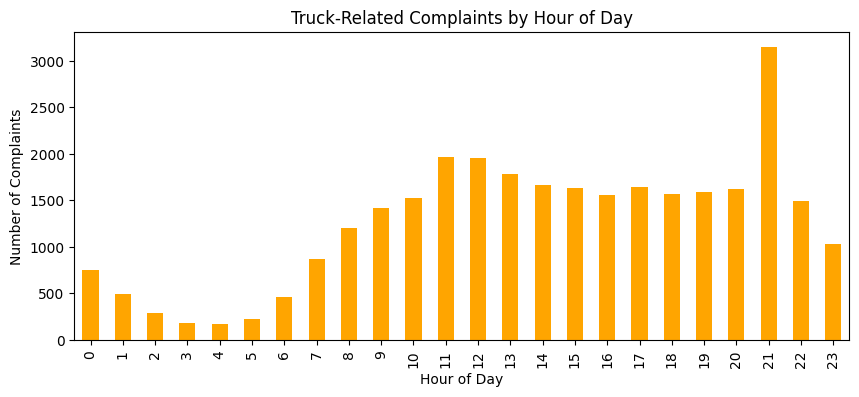

In [91]:
import matplotlib.pyplot as plt

df_truck_broader['created_date'] = pd.to_datetime(df_truck_broader['created_date'], errors='coerce')
df_truck_broader['hour'] = df_truck_broader['created_date'].dt.hour

df_truck_broader['hour'].value_counts().sort_index().plot(
    kind='bar',
    figsize=(10,4),
    color='orange'
)

plt.title('Truck-Related Complaints by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Complaints')
plt.show()

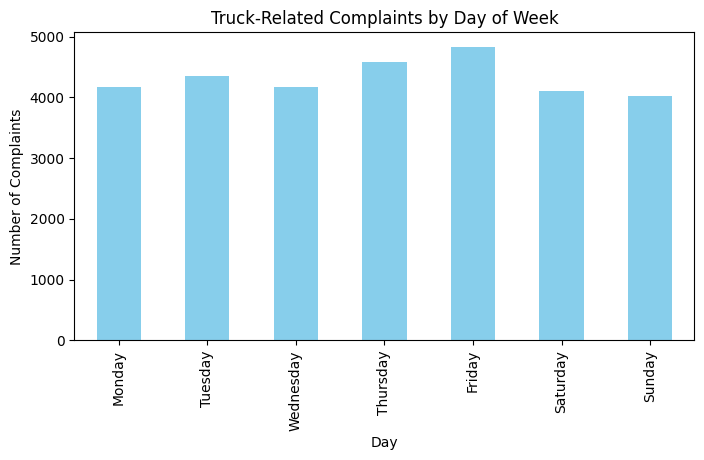

In [93]:
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

df_truck_broader['day_of_week'] = df_truck_broader['created_date'].dt.day_name()

df_truck_broader['day_of_week'].value_counts().reindex(order).plot(
    kind='bar',
    figsize=(8,4),
    color='skyblue'
)

plt.title('Truck-Related Complaints by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Complaints')
plt.show()


In [94]:
from folium.plugins import HeatMap

df_heat = df_truck_broader.dropna(subset=['latitude', 'longitude'])
print("Heatmap points:", len(df_heat))

m = folium.Map(location=[40.7831, -73.9712], zoom_start=12, tiles="CartoDB Positron")

heat_data = df_heat[['latitude', 'longitude']].values.tolist()

HeatMap(
    heat_data,
    radius=8,
    blur=10,
    max_zoom=13,
    min_opacity=0.4
).add_to(m)

m.save("../data/truck_congestion_heatmap_broader.html")
print("Saved broader heatmap.")

Heatmap points: 29714
Saved broader heatmap.


In [78]:
import folium
import pandas as pd

# Load your cleaned dataset
df_truck_clean = pd.read_csv(r"C:\Users\karan\Desktop\Important\nyc-curbside-congestion\data\311_truck_clean_2023_now.csv")

# Create base Manhattan map
m = folium.Map(location=[40.7831, -73.9712], zoom_start=12)

# Add red markers for each truck complaint
for _, row in df_truck_clean.dropna(subset=['latitude','longitude']).iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=2,
        color='red',
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

# Save to HTML and open in your browser
m.save(r"C:\Users\karan\Desktop\Important\nyc-curbside-congestion\data\truck_points_map.html")
print("✅ Map saved! Open truck_points_map.html to view.")


✅ Map saved! Open truck_points_map.html to view.


In [79]:
from folium.plugins import HeatMap
import folium
import pandas as pd

In [80]:
# Load your clean dataset
df_truck_clean = pd.read_csv(r"C:\Users\karan\Desktop\Important\nyc-curbside-congestion\data\311_truck_clean_2023_now.csv")

# Drop rows missing location data
df_heat = df_truck_clean.dropna(subset=['latitude', 'longitude'])
print("Heatmap points:", len(df_heat))


Heatmap points: 29714


In [81]:
# Create base map centered on Manhattan
m = folium.Map(location=[40.7831, -73.9712], zoom_start=12, tiles="CartoDB Positron")

# Prepare coordinates as a list of [lat, lon] pairs
heat_data = df_heat[['latitude', 'longitude']].values.tolist()

# Add the heatmap layer
HeatMap(
    heat_data,
    radius=8,        # controls how large each point appears
    blur=10,         # smooths the edges of heat spots
    max_zoom=13,     # how detailed zooming gets
    min_opacity=0.4  # transparency level
).add_to(m)

# Save to HTML so you can open it
m.save(r"C:\Users\karan\Desktop\Important\nyc-curbside-congestion\data\truck_congestion_heatmap.html")
print("✅ Heatmap saved! Open 'truck_congestion_heatmap.html' to view it.")


✅ Heatmap saved! Open 'truck_congestion_heatmap.html' to view it.


In [82]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data (use your clean dataset)
df = pd.read_csv(r"C:\Users\karan\Desktop\Important\nyc-curbside-congestion\data\311_truck_clean_2023_now.csv")

# Keep only rows with coordinates
coords = df.dropna(subset=['latitude', 'longitude'])[['latitude', 'longitude']].values

# Standardize coordinates for clustering
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)


In [70]:
# Run DBSCAN
db = DBSCAN(eps=0.05, min_samples=20).fit(coords_scaled)

# Add cluster labels to dataframe
df_clustered = df.dropna(subset=['latitude', 'longitude']).copy()
df_clustered['cluster'] = db.labels_


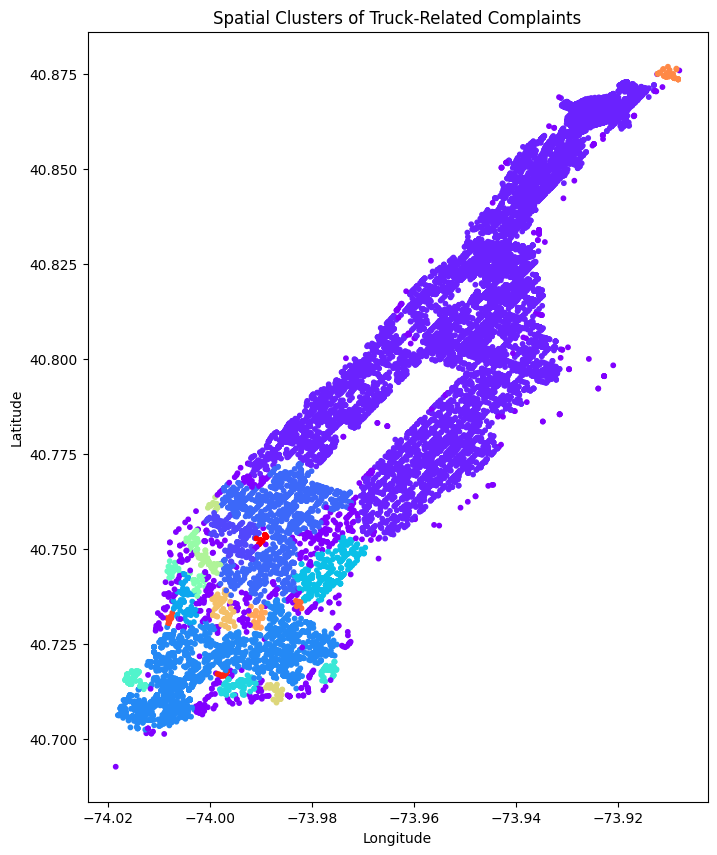

In [71]:
plt.figure(figsize=(8, 10))
plt.scatter(
    df_clustered['longitude'],
    df_clustered['latitude'],
    c=df_clustered['cluster'],
    cmap='rainbow',
    s=10
)
plt.title("Spatial Clusters of Truck-Related Complaints")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


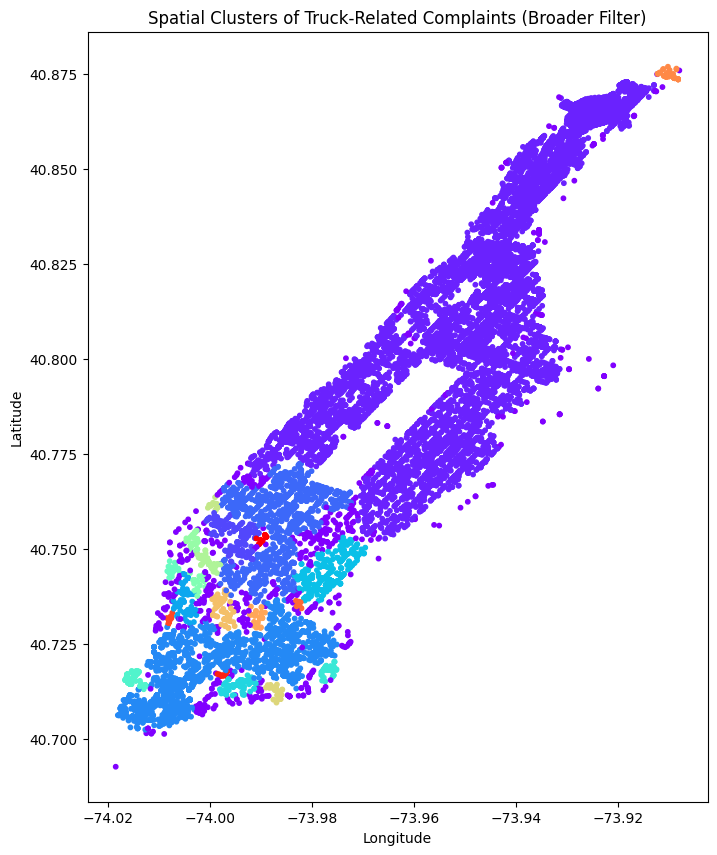

Saved broader clustering file.


In [95]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Drop rows missing coordinates
df_cluster = df_truck_broader.dropna(subset=['latitude', 'longitude']).copy()

coords = df_cluster[['latitude', 'longitude']].values

# Standardize
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

# Run DBSCAN
db = DBSCAN(eps=0.05, min_samples=20).fit(coords_scaled)

# Add cluster labels
df_cluster['cluster'] = db.labels_

# Plot
plt.figure(figsize=(8,10))
plt.scatter(
    df_cluster['longitude'],
    df_cluster['latitude'],
    c=df_cluster['cluster'],
    cmap='rainbow',
    s=10
)

plt.title("Spatial Clusters of Truck-Related Complaints (Broader Filter)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Save
df_cluster.to_csv("../data/311_truck_clusters_broader.csv", index=False)
print("Saved broader clustering file.")


In [72]:
print(df_clustered['cluster'].value_counts())
print("Number of clusters (excluding noise):", len(set(db.labels_)) - (1 if -1 in db.labels_ else 0))


cluster
 0     22672
 3      2662
 2      1696
-1       683
 1       529
 5       494
 8       130
 12      125
 15      125
 4       100
 6        94
 7        72
 17       50
 10       45
 14       43
 16       42
 11       37
 9        29
 13       27
 19       19
 21       17
 18       13
 20       10
Name: count, dtype: int64
Number of clusters (excluding noise): 22


In [73]:
df_clustered['cluster'].value_counts().head(10)

cluster
 0     22672
 3      2662
 2      1696
-1       683
 1       529
 5       494
 8       130
 12      125
 15      125
 4       100
Name: count, dtype: int64

In [74]:
df_clustered.to_csv(r"C:\Users\karan\Desktop\Important\nyc-curbside-congestion\data\311_truck_clusters.csv", index=False)
print("✅ Saved clustered dataset successfully.")

✅ Saved clustered dataset successfully.


In [96]:
import pandas as pd
from pathlib import Path

# 1) Raw trimmed file summary
df_raw = pd.read_csv(Path("../data/311_manhattan_2023_now.csv"), parse_dates=["created_date"])
print("Raw:", len(df_raw), "rows")
print("Date range:", df_raw["created_date"].min(), "->", df_raw["created_date"].max())
print("Missing lat/lon:", df_raw[["latitude","longitude"]].isna().sum().to_dict())
print("Top complaint types:\n", df_raw["complaint_type"].value_counts().head(10))

# 2) Broader filtered set summary
df_b = pd.read_csv(Path("../data/311_truck_clean_broader.csv"), parse_dates=["created_date"])
print("\nBroader filtered:", len(df_b), "rows")
print("Date range:", df_b["created_date"].min(), "->", df_b["created_date"].max())
print("Complaint types:\n", df_b["complaint_type"].value_counts())
print("Missing lat/lon:", df_b[["latitude","longitude"]].isna().sum().to_dict())
print("Sample descriptors:", df_b["descriptor"].dropna().unique()[:10])

# 3) Cluster summary
df_c = pd.read_csv(Path("../data/311_truck_clusters_broader.csv"), parse_dates=["created_date"])
print("\nClusters:", len(df_c), "rows")
print("Date range:", df_c["created_date"].min(), "->", df_c["created_date"].max())
print("Cluster counts (top 10):\n", df_c["cluster"].value_counts().head(10))
print("Unique clusters:", df_c["cluster"].nunique())

Raw: 30258 rows
Date range: 2023-01-01 00:31:23 -> 2025-11-07 11:58:29
Missing lat/lon: {'latitude': 544, 'longitude': 544}
Top complaint types:
 complaint_type
Illegal Parking    30258
Name: count, dtype: int64

Broader filtered: 30258 rows
Date range: 2023-01-01 00:31:23 -> 2025-11-07 11:58:29
Complaint types:
 complaint_type
Illegal Parking    30258
Name: count, dtype: int64
Missing lat/lon: {'latitude': 544, 'longitude': 544}
Sample descriptors: ['Double Parked Blocking Traffic' 'Double Parked Blocking Vehicle'
 'Commercial Overnight Parking' 'Overnight Commercial Storage']

Clusters: 29714 rows
Date range: 2023-01-01 00:31:23 -> 2025-11-07 11:58:29
Cluster counts (top 10):
 cluster
 0     22672
 3      2662
 2      1696
-1       683
 1       529
 5       494
 8       130
 12      125
 15      125
 4       100
Name: count, dtype: int64
Unique clusters: 23
